# EOFs with Real Data

We have now established how we can use PCA to extract the dominant patterns (aka "leading modes") of variability in a multi-dimensional variable of interest. Now, we are going to work through an example and discuss some of the practicalities of PCA when working with climate and geophysical data sets. 

## Case Study: North Atlantic Oscillation (NAO)

The example that we are going to look at is the North Atlantic Oscillation (NAO). The NAO is a weather and climate mode of variability in the North Atlantic region. It is characterized by fluctuations in the difference in anomalous sea-level pressure (SLP) between the Icelandic low and the Azores high. Fluctuations in the difference between SLP within the Icelandic low and Azores high, reflects fluctuations in the strength and position of westerly jet stream and storm tracks across the North Atlantic. The NAO is the leading mode of atmospheric variability via PCA in the North Atlantic extratropical region and is most active during the winter season.

Let's begin by reading in some gridded, reanalysis SLP data. Reanalysis data products are quasi-observational data products that provide global coverage of atmospheric and surface variables. We will use SLP from the [ERA-Interim](https://www.ecmwf.int/en/forecasts/datasets/reanalysis-datasets/era-interim) reanalysis product. You can download the netcdf file [here](https://www.dropbox.com/s/brssg2g5m2tzn6y/ERAI_PSL_1980_2017.nc?dl=0).

In [1]:
# load packages
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib as mpl
mpl.rc('font',size=14) #set default font size and weight for plots
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Data is from the ERA-Interim reanalysis data product.
# It was downloaded from http://apps.ecmwf.int/datasets/data/interim-full-moda/levtype=sfc/
# only Dec, Jan, Feb and Mar of each season are contained in this file

# open netcdf file
fname = 'ERAI_PSL_1980_2017.nc' 
nc    = Dataset(fname)
slp   = np.squeeze(nc.variables['msl'][:,:,:])
lon   = nc.variables['longitude'][:]
lat   = nc.variables['latitude'][:]

Let's take a look at the shape of our data.

In [3]:
print(slp.shape,len(lat),len(lon))

(152, 241, 480) 241 480


Looks like we have a 3-D variable and the dimensions are in the following order: (time, lat, lon): 152 time points, 241 latitudes and 480 longitudes. Since the file that we have read in contains 4 months per year, we have 38 years of wintertime SLP data. For simplicity, let's create December - March seasonal means.

In [4]:
# create average winter seasons (Dec-Mar). 
slp_djfm = np.mean(slp.reshape(-1, 4,len(lat),len(lon)), axis=1)
print(slp_djfm.shape)

(38, 241, 480)


Now, our time dimension reflects the 38 years of mean winter data. To get a sense of what this data looks like, let's calculate the climatological mean SLP and plot it on a map using `cartopy`.

In [5]:
# calculate the climatological mean DJFM slp, i.e. average over all years
slp_djfm_clim = np.mean(slp_djfm,axis=0)

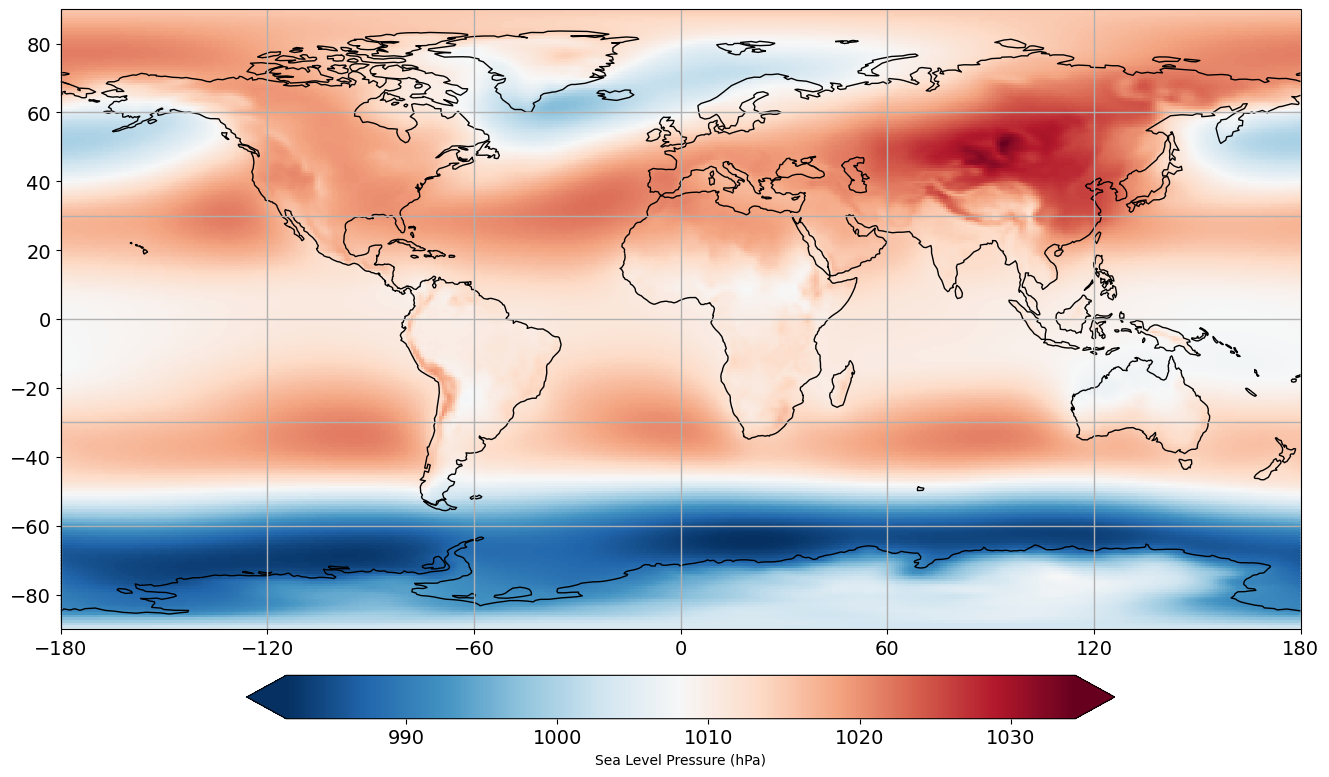

In [6]:
# set up plot
fig = plt.figure(figsize=(16,12))

# define the map projection: the projection keyword determines how the plot will look
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.gridlines(linewidth=1)
ax.set_xticks([-180, -120, -60, 0, 60, 120, 180],crs=ccrs.PlateCarree())
ax.set_yticks([-80, -60, -40, -20, 0, 20, 40, 60, 80],crs=ccrs.PlateCarree())

# plot data
pc = ax.pcolormesh(lon,lat,slp_djfm_clim/100.0,cmap="RdBu_r")

# add colorbar
cax,kw = mpl.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.7)
out=fig.colorbar(pc,cax=cax,extend='both',**kw)
out.set_label('Sea Level Pressure (hPa)',size=10)

This looks reasonable. We see higher SLP in the hot sub-tropical regions and lower SLP in the storm track regions.

Before we move on, we need to prepare our data a bit more. The NAO is defined for over the North Atlantic region: from 20-90$^{\circ}$N and 90$^{\circ}$W-30$^{\circ}$E, so we need to select the latitudes and longitudes that we are interested in. Let's look at the latitude dimension first.

In [7]:
print(lat)

[ 90.    89.25  88.5   87.75  87.    86.25  85.5   84.75  84.    83.25
  82.5   81.75  81.    80.25  79.5   78.75  78.    77.25  76.5   75.75
  75.    74.25  73.5   72.75  72.    71.25  70.5   69.75  69.    68.25
  67.5   66.75  66.    65.25  64.5   63.75  63.    62.25  61.5   60.75
  60.    59.25  58.5   57.75  57.    56.25  55.5   54.75  54.    53.25
  52.5   51.75  51.    50.25  49.5   48.75  48.    47.25  46.5   45.75
  45.    44.25  43.5   42.75  42.    41.25  40.5   39.75  39.    38.25
  37.5   36.75  36.    35.25  34.5   33.75  33.    32.25  31.5   30.75
  30.    29.25  28.5   27.75  27.    26.25  25.5   24.75  24.    23.25
  22.5   21.75  21.    20.25  19.5   18.75  18.    17.25  16.5   15.75
  15.    14.25  13.5   12.75  12.    11.25  10.5    9.75   9.     8.25
   7.5    6.75   6.     5.25   4.5    3.75   3.     2.25   1.5    0.75
   0.    -0.75  -1.5   -2.25  -3.    -3.75  -4.5   -5.25  -6.    -6.75
  -7.5   -8.25  -9.    -9.75 -10.5  -11.25 -12.   -12.75 -13.5  -14.25
 -15. 

In [8]:
# extract only latitudes 20N-90N
lat_nao = lat[0:94]

Now, let's take a look at the longitude dimension.

In [9]:
print(lon)

[  0.     0.75   1.5    2.25   3.     3.75   4.5    5.25   6.     6.75
   7.5    8.25   9.     9.75  10.5   11.25  12.    12.75  13.5   14.25
  15.    15.75  16.5   17.25  18.    18.75  19.5   20.25  21.    21.75
  22.5   23.25  24.    24.75  25.5   26.25  27.    27.75  28.5   29.25
  30.    30.75  31.5   32.25  33.    33.75  34.5   35.25  36.    36.75
  37.5   38.25  39.    39.75  40.5   41.25  42.    42.75  43.5   44.25
  45.    45.75  46.5   47.25  48.    48.75  49.5   50.25  51.    51.75
  52.5   53.25  54.    54.75  55.5   56.25  57.    57.75  58.5   59.25
  60.    60.75  61.5   62.25  63.    63.75  64.5   65.25  66.    66.75
  67.5   68.25  69.    69.75  70.5   71.25  72.    72.75  73.5   74.25
  75.    75.75  76.5   77.25  78.    78.75  79.5   80.25  81.    81.75
  82.5   83.25  84.    84.75  85.5   86.25  87.    87.75  88.5   89.25
  90.    90.75  91.5   92.25  93.    93.75  94.5   95.25  96.    96.75
  97.5   98.25  99.    99.75 100.5  101.25 102.   102.75 103.5  104.25
 105. 

The region that we are intersted in, the North Atlantic, straddles the Greenwich meridion, 0$^{\circ}$. So, we need to rearrange our longitude dimension and our SLP data.

In [10]:
# only longitudes 90W-30E
lon1 = lon[0:41]
lon2 = lon[360:480] - 360 # subtract 360 degrees in order to create a monotonically increasing longitude dimension for plotting
lon_nao = np.hstack((lon2,lon1))

Let's slice the SLP data accordingly to isolate the North Atlantic region.

In [11]:
slp_djfm1 = slp_djfm[:,0:94,0:41]
slp_djfm2 = slp_djfm[:,0:94,360:480]
slp_djfm_nao = np.concatenate((slp_djfm2,slp_djfm1),axis=2)

Let's plot this regional data to make sure we have selected our region correctly.

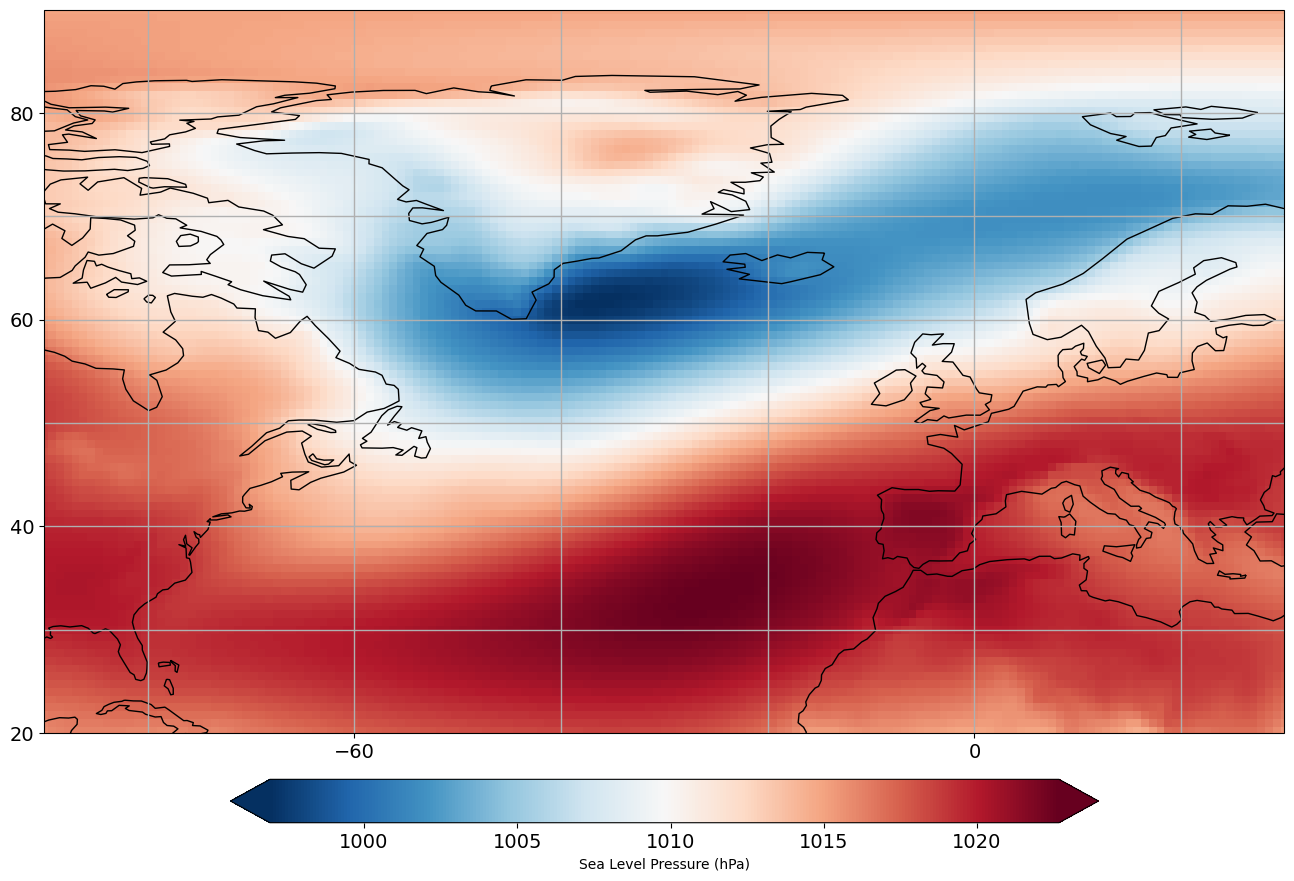

In [12]:
# set up plot
fig = plt.figure(figsize=(16,12))

# define the map projection: the projection keyword determines how the plot will look
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.gridlines(linewidth=1)
ax.set_xticks([-60, 0, 60],crs=ccrs.PlateCarree())
ax.set_yticks([20, 40, 60, 80],crs=ccrs.PlateCarree())
# added ax.set_extent
ax.set_extent([-90,30,20,90])

# plot data
pc = ax.pcolormesh(lon_nao,lat_nao,np.mean(slp_djfm_nao,axis=0)/100.0,cmap="RdBu_r")

# add colorbar
cax,kw = mpl.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.7)
out=fig.colorbar(pc,cax=cax,extend='both',**kw)
out.set_label('Sea Level Pressure (hPa)',size=10)

### A Note about Missing Data

Most statistical algorithms for eigenanalysis with not work with missing values or NaNs. These missing values will have to be filled with something. In the introduction section, we filled them with zeros. In the NAO example that we are working on, there are no missing values in our data.

This now brings us to the first step of EOF analysis.

### Step 1: Remove the mean

It is typical to remove the sampling dimension mean, which is usually the time dimension. This will result in your principal component time series having a mean of zero. You may also want to remove the seasonal or diurnal cycle if this is not of interest to you.

It is less common to remove the spatial mean. For example, suppose you are interested in the gradients in temperature, not the full temperature field itself or you are interested in the "wavy" component of the field, so you might remove the zonal mean.

In [13]:
# remove the time mean, i.e., calculate anomalies (subtract the mean over each time series for each grid point)
slp_djfm_anom_nao = np.ma.anom(slp_djfm_nao,axis=0)

### Step 2: Standardizing the data (optional)

Sometimes, it is desirable to take the amplitude of the variability out of the data before doing EOF analysis. For example, you may want to do this if

* your data is made of a combination of parameters with different units, and you don't want the parameter with the biggest units to dominate the variance

* if the variance of the data varies greatly in space (and this is not of interest to you)

In order to do this, you divide your anomaly data by its standard deviation as well (now your data is in units of $\sigma$). For the NAO example, we will not standardize the data as we are interested in capturing the spatial the magnitude of the variability.

### Step 3: Weighting gridded data

If the data is gridded, you need to weight the data according to the grid box area. For example, if the data is on a rectangular grid on a sphere (like in our example), the size of the grid boxes decreases as you move from the equator to the poles. There are two considerations with doing area weighting on a sphere:

* if you are calculating EOFs using the covariance matrix and you are analyzing the *temporal covariance matrix* (i.e., your covariance matrix is $\mathbf{C} = \mathbf{XX^T}$ $[M x M]$, where $M$ is the time dimension), you weight by $\sqrt{\text{cos}(\theta)}$. We use the square-root since when you multiply the grid points by each other you will get your full $\text{cos}(\theta)$ in your covariance matrix (where $\theta$ is latitude in radians)

* if you are calculating EOFs using the covariance matrix and you are analyzing the *spatial dispersion matrix* (i.e., your covariance matrix is $\mathbf{C} = \mathbf{X^TX}$ $[N x N]$, where $N$ is the spatial dimension), you weight by $\text{cos}(\theta)$ but have to be careful about this. Specifically, you weight your covariance matrix in the following way: $\mathbf{C} = \mathbf{X^TX_{cos}}$, where the elements of $\mathbf{X_{cos}}$ are given by $x(t,\theta)\text{cos}(\theta)$.

Note that the resulting EOFs will look unphysical and have unphysical values, this will be remedied when we discuss how to present EOFs (see below).

In the introduction to PCA section, we did not cosine-weight the data. This is because our analysis was focused on the tropical region, where the size of the grid boxes does not change too much. But, it is generally good practice to cosine-weight your data.

So, let's continue our example and cosine-weight our SLP data. We are going to construct the *temporal covariance matrix*, so we will weight our data by the square-root of the cosine of latitude. In the previous section, it was noted that the *spatial dispersion matrix* is often preferred, but for this example, it will take too long to run.

In [14]:
# square-root cosine-weight
cos_wgt = np.sqrt(np.cos((lat_nao*np.pi/180.0))) # must be in radians

slp_djfm_anom_cw = np.zeros((slp_djfm_anom_nao.shape[0],slp_djfm_anom_nao.shape[1],slp_djfm_anom_nao.shape[2]))
for i in range(slp_djfm_anom_nao.shape[0]):
    for j in range(slp_djfm_anom_nao.shape[2]):
        slp_djfm_anom_cw[i,:,j] = cos_wgt*slp_djfm_anom_nao[i,:,j]

### Step 4: Convert 3D array to 2D matrix

The next step is to convert our 3D array into a 2D matrix, so that we can perform matrix operations, specifically so that we can calculate the covariance matrix. We do this by combining all the spatial dimensions together.

In [15]:
# reshape the array to have one time dimension and one spatial dimension (Nt = time, Ny = latitude, Nx = longitude)
Nt, Ny, Nx = slp_djfm_anom_cw.shape
slp_djfm_anom_cw.shape = (Nt, Ny*Nx)

The new dimensions of our SLP data array are:

In [16]:
print(Nt, Ny*Nx)

38 15134


### Step 5: Calculate the covariance matrix

Our data is now ready for us to calculate the covariance matrix. Remember that we are going to calculate the temporal covariance matrix due to the slow computation speed associated with calculating the spatial dispersion matrix.

In [17]:
# calculate the covariance matrix
C = np.cov(slp_djfm_anom_cw)
print(C.shape)

(38, 38)


### Step 6: Perform eigenanalysis of the covariance matrix

The next step is the eigenanalysis. Note that because we are eigenanalyzing the temporal covariance matrix, which is $[M x M]$, the eigenvectors will be $[M x 1]$, not $[N x 1]$ as in the conceptual example in the last section. The implications of this are that the eigenvectors correspond to the principal component time series and we will calculate the spatial patterns, the EOFs, by performing a linear transformation.

In [18]:
# eigenanalyze C
LAM, E = np.linalg.eig(C)

In [19]:
# extract the 1st eigenvector/principal component time series
pc_ts = E[:,0]
print(pc_ts.shape)

(38,)


In [20]:
# compute the 1st EOF
# the EOFs are computed by projecting the data matrix onto the PC time series
nao_pat  = np.reshape(np.dot(slp_djfm_anom_cw.T,E[:,0]), (Ny,Nx)) 

Note that we project the *weighted* data matrix onto the PC time series as this is what was used to calculate the covariance matrix.

Let's plot the EOF and PC time series to see what they look like.

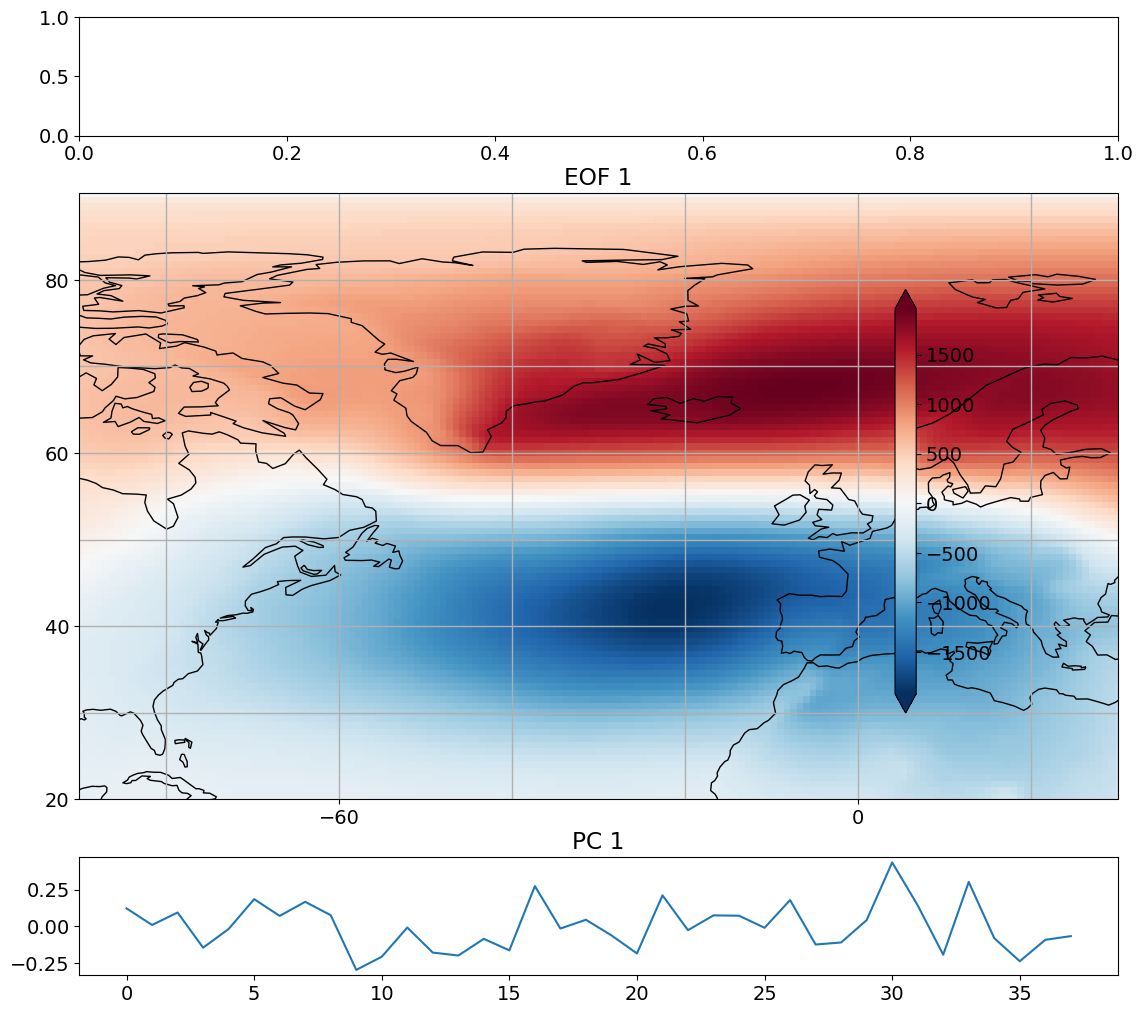

In [21]:
# look at first eof pattern and pc timeseries
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(6,1,1)
ax1 = plt.axes(projection=ccrs.PlateCarree())
ax1.coastlines()
ax1.gridlines(linewidth=1)
ax1.set_xticks([-60, 0, 60],crs=ccrs.PlateCarree())
ax1.set_yticks([20, 40, 60, 80],crs=ccrs.PlateCarree())
# added ax.set_extent
ax1.set_extent([-90,30,20,90])
ax1.set_title('EOF 1')
pc = ax1.pcolormesh(lon_nao, lat_nao, nao_pat,cmap='RdBu_r')
cax,kw = mpl.colorbar.make_axes(ax1,location='right',pad=0.05,shrink=0.55)
out=fig.colorbar(pc,cax=cax,extend='both',**kw)
plt.tight_layout()

ax2 = fig.add_subplot(6,1,6)
plt.plot(pc_ts)
ax2.set_title('PC 1')
plt.tight_layout()

## Presenting EOFs/PCs

The EOFs $\mathbf{E}$ and PC time series $\mathbf{Z}$ that result from eigenanalysis of $\mathbf{C}$ are typically not in physical units. Recall that we have cosine-weighted our data and that the eigenvectors are unit vectors. Thus, there are a few post-processing steps that we need to go through in order to present our EOFs/PCs in a meaningful way.

Let $\mathbf{X}$ have dimensions $[M x N]$ such that $M$ is the number of observations and $N$ is the number spatial locations. From now on, to make notation a bit easier, we will only write equations using EOF 1 and PC 1. The steps can be repeated for EOF 2 and PC 2, EOF 3 and PC 3, etc.

Typically, we convert the PC time series to units of standard deviation. So, we simply need to standardize $\mathbf{Z}$ to create an index.

We then project $\mathbf{Z}$ back onto your original anomaly data and divide by the length of $\mathbf{Z}$ to get $\mathbf{D}$, the EOF 1 structure in the original units i.e. the unweighted data $\mathbf{X}$. If $\mathbf{X}$ was standardized before the computation, the non-standardized data should be used.

If the original data is $\mathbf{X}$, the weighted data is $\mathbf{X_{cos}}$, we write the PC time series as,

$$
\mathbf{z_1} = \mathbf{X_{cos}e_1}
$$

The standardized PC time series is then simply,

$$
\mathbf{\tilde{z_1}} = \frac{z_1 - \mu_{z_1}}{\sigma_{z_1}}
$$

and the EOF in physical units is,

$$
\mathbf{d_1} = \frac{1}{M}\mathbf{\tilde{z_1}^TX}
$$

$\mathbf{d_1}$ is now in the physical units of your data, and represents the anomaly associated with one a standard deviation variation of $\mathbf{z_1}$.

Note that you can project $\mathbf{\tilde{z_1}}$ onto other variables as well. For example, in the case of the NAO, we can project $\mathbf{\tilde{z_1}}$ onto the temperature or zonal wind in the North Atlantic to see how these variables vary with the NAO index.

Let's take a look at how this is done using our NAO example. First, we standardize the PC time series.

In [22]:
# standardize PC 1 time series
pc_ts_std = (pc_ts - np.mean(pc_ts))/np.std(pc_ts)

Next, we project this standardized time series onto our original, unweighted data.

In [23]:
# convert the EOF into physical units

# first reshape original data from 3D to 2D
slp_djfm_anom_nao.shape = (Nt, Ny*Nx)

# project standardized PC 1 time series onto data
nao_pat_phys = np.dot(pc_ts_std.T,slp_djfm_anom_nao)*(1/len(pc_ts_std))

#reshape back for plotting
nao_pat_phys  = np.reshape(nao_pat_phys, (Ny,Nx))

We can now plot EOF 1 and PC 1 in such a way that we can better interpret their meaning.

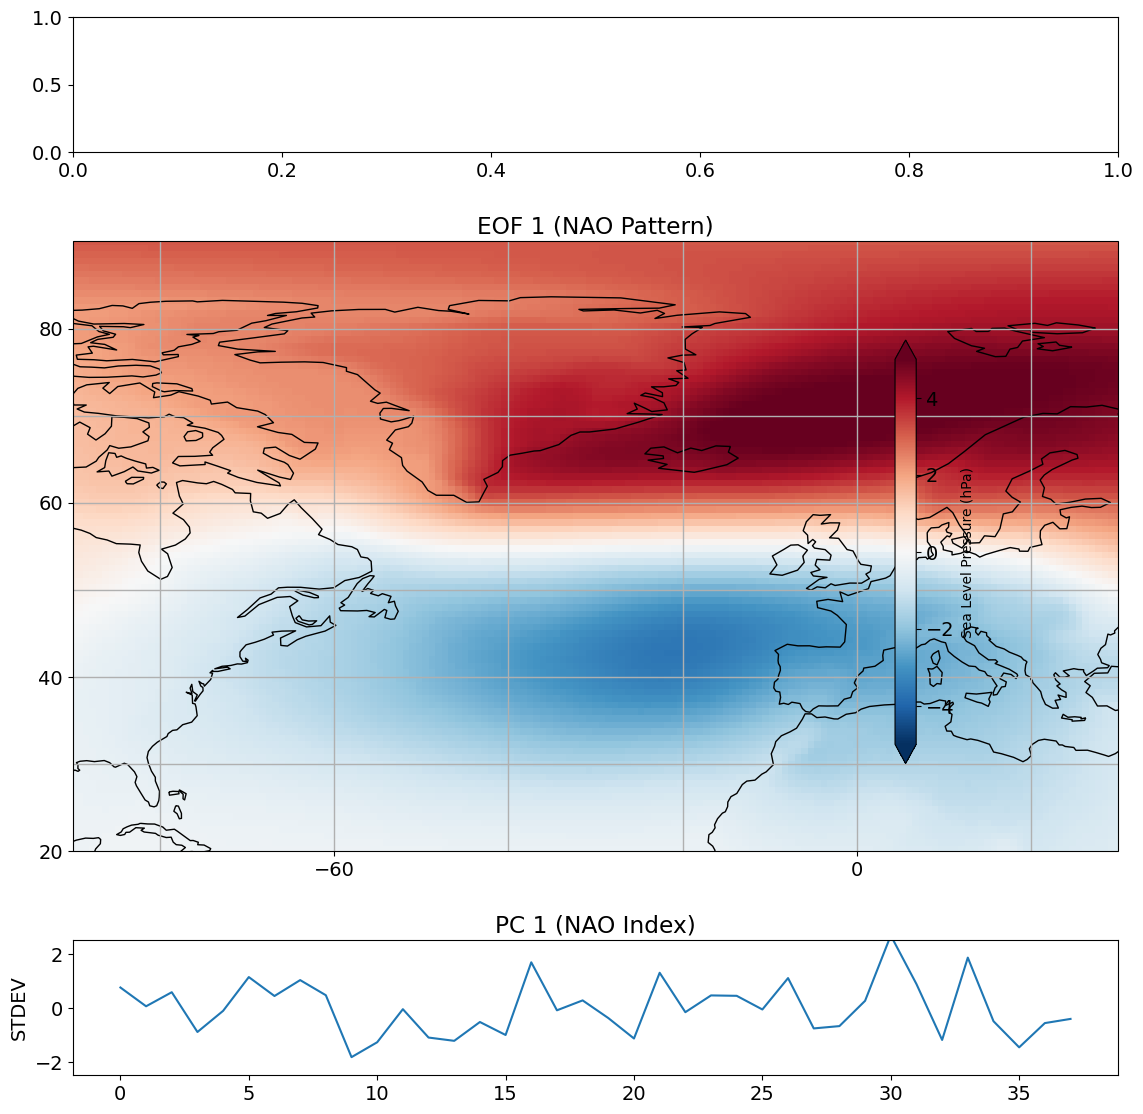

In [24]:
# look at first eof pattern and pc timeseries
fig = plt.figure(figsize=(12,11))
ax1 = fig.add_subplot(6,1,1)
ax1 = plt.axes(projection=ccrs.PlateCarree())
ax1.coastlines()
ax1.gridlines(linewidth=1)
ax1.set_xticks([-60, 0, 60],crs=ccrs.PlateCarree())
ax1.set_yticks([20, 40, 60, 80],crs=ccrs.PlateCarree())
# added ax.set_extent
ax1.set_extent([-90,30,20,90])
ax1.set_title('EOF 1 (NAO Pattern)')
pc = ax1.pcolormesh(lon_nao, lat_nao, nao_pat_phys/100.0,vmax=5,vmin=-5,cmap='RdBu_r')
cax,kw = mpl.colorbar.make_axes(ax1,location='right',pad=0.05,shrink=0.5)
out=fig.colorbar(pc,cax=cax,extend='both',**kw)
out.set_label('Sea Level Pressure (hPa)',size=10)
plt.tight_layout()

ax2 = fig.add_subplot(6,1,6)
plt.plot(pc_ts_std)
ax2.set_ylim(-2.5,2.5)
ax2.set_title('PC 1 (NAO Index)')
ax2.set_ylabel('STDEV')
plt.tight_layout()

So, this is our NAO pattern and NAO Index. The pattern that we get shows a dipole in SLP. A +1 standard deviation value of our PC time series corresponds to exactly this pattern, while a -1 standard deviation corresponds to exactly -1 x this pattern. The standard definition of the NAO is actually opposite to what we are seeing above. Recall that eigenvectors can span either the positive part or the negative part of a particular dimension. What we are seeing above is actually the negative phase of the NAO. If we multiply both the NAO pattern and NAO Index by -1, we get the standard definition of the NAO. 

Let's take a look at projecting the PC time series onto the zonal wind at 500 hPa (mid-troposphere).

In [25]:
#open netcdf file
fname = 'ERAI_U500_1980_2017.nc'
nc    = Dataset(fname)
u500  = np.squeeze(nc.variables['u'][:,:,:])

In [26]:
# create average winter seasons (Dec-Mar). 
u500_djfm = np.mean(u500.reshape(-1, 4,len(lat),len(lon)), axis=1)

# compute anomaly
u500_djfm_anom = np.ma.anom(u500_djfm,axis=0)

# extract u500 for the NAO region latitudes and longitudes
u500_djfm_anom1 = u500_djfm_anom[:,0:94,0:41]
u500_djfm_anom2 = u500_djfm_anom[:,0:94,360:480]
u500_djfm_anom_nao = np.concatenate((u500_djfm_anom2,u500_djfm_anom1),axis=2)

Now, we perform the projection in the same way that we did for the SLP data.

In [27]:
# reshape 3D array to 2D matrix 
u500_djfm_anom_nao.shape = (Nt, Ny*Nx)

# project PC 1 onto zonal wind
u_proj = np.dot(pc_ts_std.T,u500_djfm_anom_nao)/float(len(pc_ts_std))

#reshape for plotting
u_nao_phys = np.reshape(u_proj, (Ny,Nx))

This projection represents the zonal wind anomaly (in m/s) associated with one a standard deviation variation of $\mathbf{z_1}$. What does this look like?

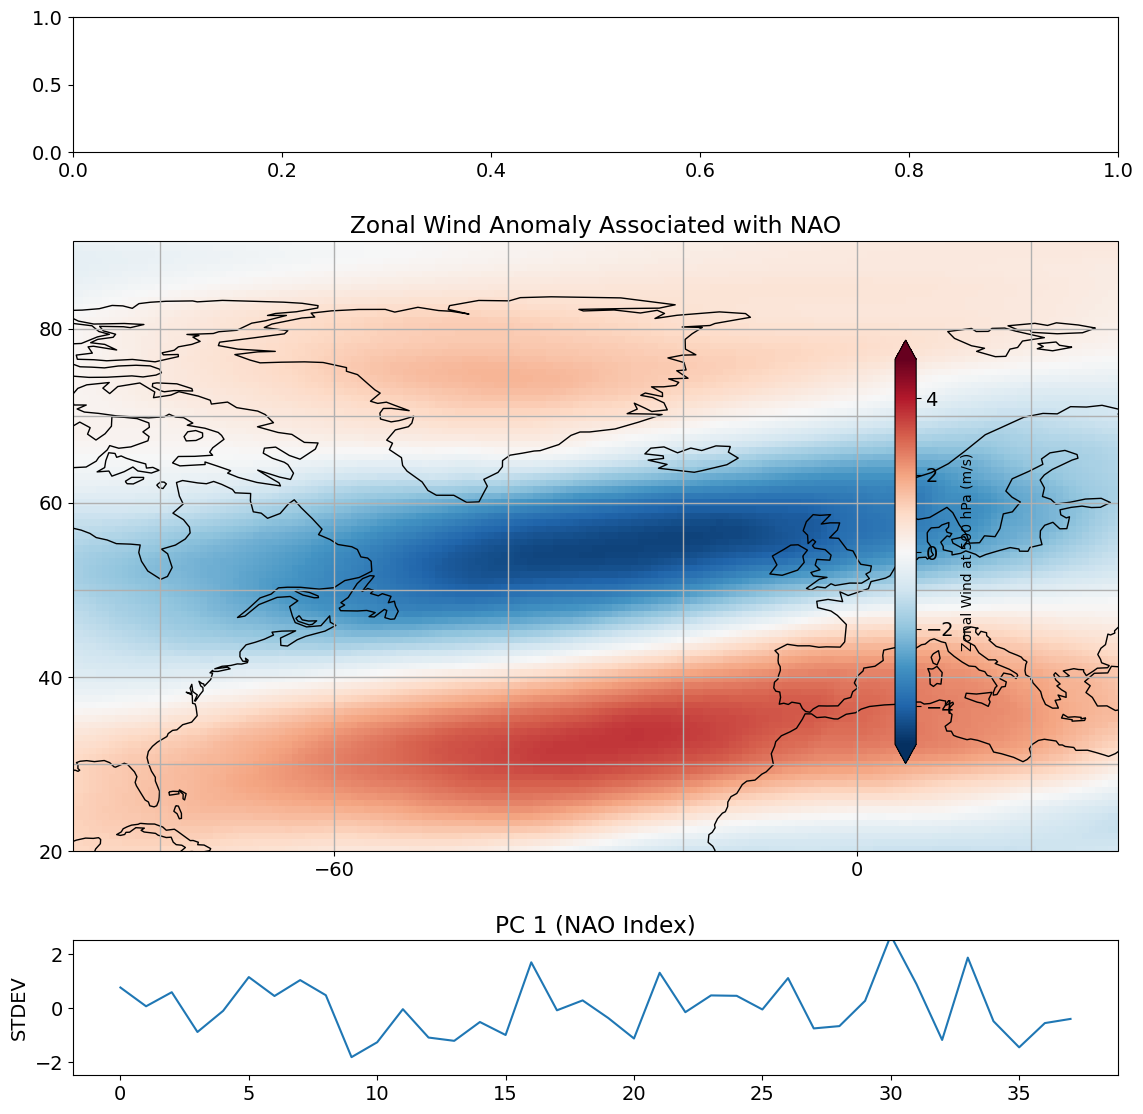

In [28]:
# look at first eof pattern and pc timeseries
fig = plt.figure(figsize=(12,11))
ax1 = fig.add_subplot(6,1,1)
ax1 = plt.axes(projection=ccrs.PlateCarree())
ax1.coastlines()
ax1.gridlines(linewidth=1)
ax1.set_xticks([-60, 0, 60],crs=ccrs.PlateCarree())
ax1.set_yticks([20, 40, 60, 80],crs=ccrs.PlateCarree())
# added ax.set_extent
ax1.set_extent([-90,30,20,90])
ax1.set_title('Zonal Wind Anomaly Associated with NAO')
pc = ax1.pcolormesh(lon_nao, lat_nao, u_nao_phys,vmax=5,vmin=-5,cmap='RdBu_r')
cax,kw = mpl.colorbar.make_axes(ax1,location='right',pad=0.05,shrink=0.5)
out=fig.colorbar(pc,cax=cax,extend='both',**kw)
out.set_label('Zonal Wind at 500 hPa (m/s)',size=10)
plt.tight_layout()

ax2 = fig.add_subplot(6,1,6)
plt.plot(pc_ts_std)
ax2.set_ylim(-2.5,2.5)
ax2.set_title('PC 1 (NAO Index)')
ax2.set_ylabel('STDEV')
plt.tight_layout()

## How many EOFs/PCs are meaningful?

Eigenanalysis of the covariance matrix will always give you an answer. The orthogonality of the eigenvectors/EOFs imposes a constraint on their pattern. Higher order EOFs are often trying to represent the noise while still being orthogonal to the other EOFs and, consequently, these patterns can become spurious statistical constructs rather than physically meaningful modes of variability.

[North et al. (1982)](https://journals.ametsoc.org/mwr/article/110/7/699/62757/Sampling-Errors-in-the-Estimation-of-Empirical) argues that the significance or robustness of an EOF is a function of the degree of separation between eigenvalues, where the 95\% confidence bounds on the eigenvalues is,

$$
\Delta\lambda = \lambda\sqrt{\frac{2}{N^*}}
$$

In this case, the N$^*$ is our friend the "effective sample size". It is not obvious how to decide what N$^*$ is - you need to come up with a value that is representative of the entire data set! Here, we will simply use the number of eigenvectors, although this is a liberal estimate.

The separation between eigenvalues is often plotted showing the variance explained by each eigenvalue along with its confidence interval. If the confidence intervals overlap, then the EOFs are not separable - they do not represent distinct patterns of variability.

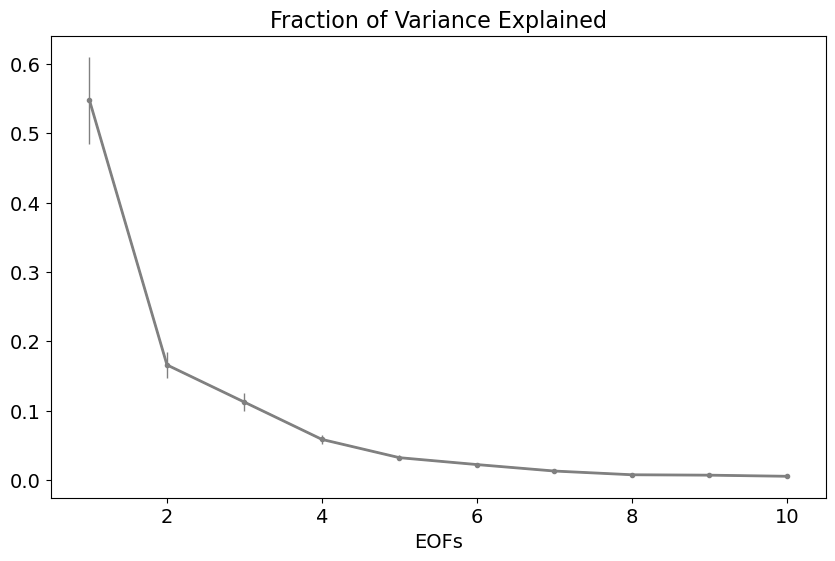

In [29]:
# set up plot
plt.figure(figsize=(10,6))

# plot fraction of variance explained by first 10 eigenvectors using the eigenvalues
plt.plot(np.arange(1,np.size(LAM[:10])+1.),LAM[:10] / LAM.sum(),'.-',color='gray',linewidth=2)
plt.xlim(0.5, 10.5)

# define N*
Nstar = len(pc_ts_std)

# compute error bars using the North et al. "rule of thumb"
eb = LAM[:10] / LAM.sum()*np.sqrt(2./float(Nstar))
plt.errorbar(np.arange(1,np.size(LAM[:10])+1.),LAM[:10] / LAM.sum(),yerr = eb/float(2), xerr = None, linewidth = 1, color = 'gray')

# add labels, title, etc.
plt.title('Fraction of Variance Explained',fontsize=16)
plt.xlabel('EOFs')
plt.show()

The first three EOFs are clearly separable and, therefore, likely physically meaningful, but the error bars start to overlap beyond that. 

The robustness of EOFs can also be established by asking the following questions:

* if you subdivide your sample, compute the EOFs for each sub-sample and compare the EOF structures, do they look roughly the same?
* are the patterns you obtain explainable through theory?
* are your results sensitive to the size of the spatial domain?

Remember that EOFs/PCs are statistical, not physical. There is often a physical explanation behind the statistical patterns obtained through PCA, but not always.